# Movie Score Data - Is Fandango Inflating Scores to Sell More Tickets?

Our dataset contains information on how major movie review services rated movies. The data originally came from [FiveThirtyEight](https://fivethirtyeight.com/features/fandango-movies-ratings/).

The dataset was put together to help detect bias in the movie review sites. Each of these sites has 2 types of score -- User scores, which aggregate user reviews, and Critic score, which aggregate professional critical reviews of the movie. Each service puts their ratings on a different scale:

- RottenTomatoes - 0-100, in increments of 1.
- Metacritic - 0-100, in increments of 1.
- IMDB - 0-10, in increments of .1.
- Fandango - 0-5, in increments of .5.

Typically, the primary score shown by the sites will be the Critic score. Here are descriptions of some of the relevant columns in the dataset:

- FILM -- the name of the movie.
- RottenTomatoes -- the RottenTomatoes (RT) critic score.
- RottenTomatoes_User -- the RT user score.
- Metacritic -- the Metacritic critic score.
- Metacritic_User -- the Metacritic user score.
- IMDB -- the IMDB score given to the movie.
- Fandango_Stars -- the number of stars Fandango gave the movie.

In [94]:
import pandas as pd
movies = pd.read_csv("/Users/chesterjohn/Desktop/dataquest/fandango/fandango_score_comparison.csv")
print(movies.head())

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70 

## Movie Score Distribution Comparison

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

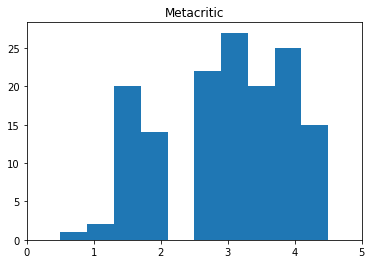

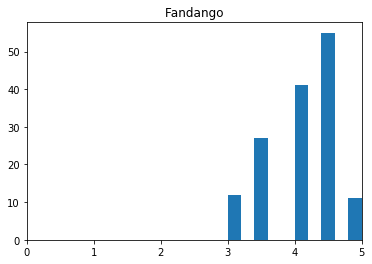

In [96]:
plt.hist(movies["Metacritic_norm_round"],bins=10)
plt.xlim(0,5)
plt.title("Metacritic")
plt.show()
plt.hist(movies["Fandango_Stars"],bins=10)
plt.xlim(0,5)
plt.title("Fandango")
plt.show()

### Our Findings
Fandango scores are obviously left-skewed with scores mostly beyond 3 stars, with mostly between 4 and 4.5, while Metacritic scores are more distributed centering around the 3-star mark, with scores going below 1. While generally the median is lower than the mean, for the case of Metacritic, there are a few movies with very low scores (if we're talking 2015, my personal pick would be Fantastic Four - what a snooze fest!) that pulled the average way down.

In [97]:
import numpy as py

fg_mean = movies["Fandango_Stars"].mean()
print("Fandango mean score: " + str(fg_mean))
fg_median = movies["Fandango_Stars"].median()
print("Fandango median score: " + str(fg_median))

mc_mean = movies["Metacritic_norm_round"].mean()
print("Metacritic mean score: " + str(mc_mean))
mc_median = movies["Metacritic_norm_round"].median()
print("Metacritic median score: " + str(mc_median))

fg_std = py.std(movies["Fandango_Stars"])
print("Fandango score standard deviation: " + str(fg_std))
mc_std = py.std(movies["Metacritic_norm_round"])
print("Metacritic score standard deviation: " + str(mc_std))

Fandango mean score: 4.089041095890411
Fandango median score: 4.0
Metacritic mean score: 2.9726027397260273
Metacritic median score: 3.0
Fandango score standard deviation: 0.5385321612699531
Metacritic score standard deviation: 0.9875610297038636


## Finding The Largest Outliers

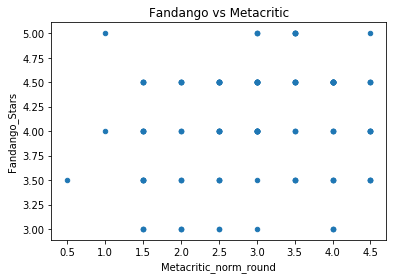

In [98]:
movies.plot(x="Metacritic_norm_round",y="Fandango_Stars",kind="scatter",title="Fandango vs Metacritic")
plt.show()

In [99]:
import numpy as np

movies["fm_diff"] = movies["Metacritic_norm_round"] - movies["Fandango_Stars"]
movies["fm_diff"] = np.absolute(movies["fm_diff"])
movies = movies.sort_values("fm_diff",ascending=False)
print(movies.head())

                        FILM  RottenTomatoes  RottenTomatoes_User  Metacritic  \
3     Do You Believe? (2015)              18                   84          22   
85         Little Boy (2015)              20                   81          30   
47              Annie (2014)              27                   61          33   
19             Pixels (2015)              17                   54          27   
134  The Longest Ride (2015)              31                   73          33   

     Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  RT_norm  \
3                4.7   5.4             5.0                   4.5     0.90   
85               5.9   7.4             4.5                   4.3     1.00   
47               4.8   5.2             4.5                   4.2     1.35   
19               5.3   5.6             4.5                   4.1     0.85   
134              4.8   7.2             4.5                   4.5     1.55   

     RT_user_norm   ...     RT_norm_round  RT_user

### Our Findings
In all honestly, I have not watched any of the movies with the biggest difference in scores, but there is no dispute that these are [some](https://www.rottentomatoes.com/m/pixels/) [of](https://www.rottentomatoes.com/m/the_longest_ride/) [the](https://www.rottentomatoes.com/m/do_you_believe) [most](https://www.rottentomatoes.com/m/annie_2012) [panned](https://www.rottentomatoes.com/m/little_boy_2015) movies of 2014 - 2015. There is no dispute that Fandango scored these movies favourably, despite what everyone else thought. 

## Finding Correlation

In [100]:
from scipy.stats import pearsonr
from scipy.stats import linregress


r_value,p_value = pearsonr(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
print(r_value)

0.178449190739


In [101]:
slope, intercept, r_value, p_value, std_err = linregress(movies["Metacritic_norm_round"],movies["Fandango_Stars"])

y_estimate_one = (slope*3)+intercept
print(y_estimate_one)

4.09170715282


In [102]:
y_estimate_two = (slope*1)+intercept
y_estimate_three = (slope*5)+intercept
print(y_estimate_three)

4.28632930877


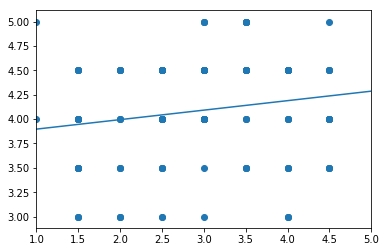

In [103]:
plt.scatter(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
plt.plot([1.0, 5.0],[y_estimate_two,y_estimate_three])
plt.xlim(1,5)
plt.show()

### Our Findings
Low r-value (below 0.25) signifies no correlation between the two set of scores. This means that Fandango's high scores do not even scale to Metacritics, and may be due to the sole purpose of selling more tickets. Fandongo may even be inflating scores of low rated movies by a shit-ton just for this purpose. Using the regression line formula, our y-estimates (estimated Fandango scores) are higher for every point on the x-axis (actual Metacritic scores) with the exception of when the Metacritic score is actually at the highest possible score of 5.